
<h1 align=left><font size = 5>Predicting Caravan Customers</font></h1>

Capstone Project: Predicting and Explaining Caravan Policy Ownership

CIND820 Big Data Analytics Project

Student Name : Manohari Wijesooriya

##  **Introduction**

A Norwegian insurance company was interested in a machine learning solution to find best customers to market its caravan insurance product. Without sending mass email to all customers, it is cost effective for the company to identify best possible customers who will buy caravan insurance and only approach those customers.

**Dataset**: Insurance Company Benchmark (COIL 2000). This data set used in the CoIL 2000 Challenge contains information on customers of an insurance company. The data consists of 86 variables and includes product usage data and socio-demographic data
Dataset can be found in this link : https://archive.ics.uci.edu/ml/datasets/Insurance+Company+Benchmark+%28COIL+2000%29


**Research questions**

Q1. Predict which customers are potentially interested in a caravan insurance policy.

Q2. Describe the actual or potential customers; and possibly explain why these customers buy a caravan policy.

Q3. How does Caravan Insurance ownership varies across different demographic areas, and can we create distinct profiles of Caravan Insurance customers based on sociodemographic data?

Q4. Predicting a customer's likelihood to purchase Caravan Insurance based on their sociodemographic characteristics

Q5. What frequent associations can be identified in the product ownership data?


##  **Approach**

*  Exploratory Data Analysis (EDA):

   *  Visit EDA   [here](https:////github.com/manohariw44/TMU-Big-Data-Analytics-Capstone-Project/blob/da078af84674f2f8550782067226fa07c35b539d/PY01_Capst_EDA.ipynb)
     


*  Preprocessing:
   * Drop attributes of low variance
   *  Encoding the categorical features
       *  Categorical to One-Hot (numeric) Encoding
   *  Split the dataset into training and testing sets
   *  Sampling technique on training set - SMOTE
   *  Create cross-validation sets

*  Classification Model:

   *  Approach 1 - Multinomial Naïve Bayes:
      *  Choose traning/test split
      *  Use Naïve Byes classifier from Python sklearn and weka packages
      *  Evaluate model using confusion matrix
      
   *  Approach 2 - Decision Tree :
      * Choose training/test split, maximum depth of tree
      * Evaluate model using confusion matrix

   *  Approach 3 - Random forest :
      * Start by randomly selecting a subset of the training data, with replacement.
      *  Select features and build decision tree
      *  Repeat steps
      *  Combine the predictions of all trees to make a final prediction

   *  Approach 4 - Logistic regression:
  
   *  Approach 5 - K Nearest Neighbours :   
      

*  Feature Selection
    *  Correlation Matrix
    * Removing features with low variance
    * Univariate feature selection
        *  Examine chi-squre score and p value for each attribute
    * Recursive Feature Elimination with Cross validation
    *  k fold cross validation
        * split training data into k equally sized subsets or folds
        * The model is trained on k-1 of these folds and tested on the remaining fold.
        * The performance of the model is then averaged across all k folds


* Association Rules:

  *  Approach 1 - Apriori :
     
      * Select features using Chi-square Test, Fisher’s Score

  * Approach 2 - Fpgrowth

  *  Approach 3 - k-means algorithm :

  * Model selection criteria
     * high accuracy, high recall on target = 1





 Import libraries

In [ ]:
#Installing Python packages
import pandas as pd
import numpy as np

import sys
!{sys.executable} -m pip install -U pandas-profiling
!jupyter nbextension enable --py widgetsnbextension
!pip install matplotlib
!pip install graphviz

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import tree

from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import confusion_matrix

from sklearn import tree
import graphviz

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

#from sklearn.feature_extraction.text import CountVectorizer

from sklearn.feature_extraction.text import TfidfVectorizer
#from naive_feature_selection import NaiveFeatureSelection

from matplotlib import colors as mcolors

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 353.0/353.0 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 9.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.4/455.4 kB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 27.2 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27079 sha256=ec1277d6d7b41bc4fca172dd14d6bc3fd43ecce9494e7accdc716246b6702e14
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: wordcloud
    Found existing installation: wordcloud 1.8.2.2
    Uninstalling wordc

In [ ]:
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

from sklearn.feature_selection import SelectFromModel
!pip install category_encoders
import category_encoders as ce

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.2 MB/s eta 0:00:00


load data and store in dataframe df_ori:

In [ ]:
# Data set for training model
df_ori = pd.read_csv("/content/ticdata2000.txt",  delimiter = "\t",header=None)

In [ ]:
# Add column headings
# column names from the data dictionary
#df_ori.columns=['MOSTYPE',	'MAANTHUI',	'MGEMOMV',	'MGEMLEEF',	'MOSHOOFD',	'MGODRK',	'MGODPR',	'MGODOV',	'MGODGE',	'MRELGE',	'MRELSA',	'MRELOV',	'MFALLEEN',	'MFGEKIND',	'MFWEKIND',	'MOPLHOOG',	'MOPLMIDD',	'MOPLLAAG',	'MBERHOOG',	'MBERZELF',	'MBERBOER',	'MBERMIDD',	'MBERARBG',	'MBERARBO',	'MSKA',	'MSKB1',	'MSKB2',	'MSKC',	'MSKD',	'MHHUUR',	'MHKOOP',	'MAUT1',	'MAUT2',	'MAUT0',	'MZFONDS',	'MZPART',	'MINKM30',	'MINK3045',	'MINK4575',	'MINK7512',	'MINK123M',	'MINKGEM',	'MKOOPKLA',	'PWAPART',	'PWABEDR',	'PWALAND',	'PPERSAUT',	'PBESAUT',	'PMOTSCO',	'PVRAAUT',	'PAANHANG',	'PTRACTOR',	'PWERKT',	'PBROM',	'PLEVEN',	'PPERSONG',	'PGEZONG',	'PWAOREG',	'PBRAND',	'PZEILPL',	'PPLEZIER',	'PFIETS',	'PINBOED',	'PBYSTAND',	'AWAPART',	'AWABEDR',	'AWALAND',	'APERSAUT',	'ABESAUT',	'AMOTSCO',	'AVRAAUT',	'AAANHANG',	'ATRACTOR',	'AWERKT',	'ABROM',	'ALEVEN',	'APERSONG',	'AGEZONG',	'AWAOREG',	'ABRAND',	'AZEILPL',	'APLEZIER',	'AFIETS',	'AINBOED',	'ABYSTAND',	'CARAVAN']
# English coulmn names for ease of reference. 1 - 43 are demographic varaibles (column name with prefix sd_), values based on zip code.
#44-86 are product ownership of insurance customers (column name with prefix po_).  target varaible : po_ins_pol_caravan
#df_ori.columns=['cust_subtype',	'no_of_houses',	'avg_household',	'avg_age_band',	'cust_maintype',	'religion_catholic',	'religion_protestant',	'religion_other',	'religion_no',	'rel_married',	'rel_living_tg',	'rel_other',	'rel_no_singles',	'hshold_wo_children',	'hshold_w_children',	'education_higher',	'education_medium',	'education_lower',	'empst_high',	'empst_Entrepr ',	'empst_farmer',	'empst_mdl_mgmt',	'empst_skill_labour',	'empst_unskill_labour',	'socialclassA',	'socialclassB1',	'socialclassB2',	'socialclassC',	'socialclassD',	'rentedhouse',	'homeowners',	'car_1',	'car_2',	'car_0',	'health_ins_national',	'health_ins_private',	'income_l_30k',	'income_30k_45k',	'income_45k_75k',	'income_75k_122k',	'income_g_123k',	'income_avg',	'p_power_class',	'ins_pol_thirdparty_pvt',	'ins_pol_thirdparty_firms',	'ins_pol_thirdparty_agri',	'ins_pol_car',	'ins_pol_del_van',	'ins_pol_motorcycle_sc',	'ins_pol_lorry',	'ins_pol_trailer',	'ins_pol_tractor',	'ins_pol_agri_machines',	'ins_pol_moped',	'ins_pol_life',	'ins_pol_accident_ins_pvt',	'ins_pol_accident_ins_fam',	'ins_pol_disability',	'ins_pol_fire',	'ins_pol_surfboard',	'ins_pol_boat',	'ins_pol_bicycle',	'ins_pol_property',	'ins_pol_social security',	'no_ins_pol_thirdparty_pvt',	'no_ins_pol_thirdparty_firms',	'no_ins_pol_thirdparty_agri',	'no_ins_pol_car',	'no_ins_pol_del_van',	'no_ins_pol_motorcycle_sc',	'no_ins_pol_lorry',	'no_ins_pol_trailer',	'no_ins_pol_tractor',	'no_ins_pol_agri_machines',	'no_ins_pol_moped',	'no_ins_pol_life',	'no_ins_pol_accident_ins_pvt',	'no_ins_pol_accident_ins_fam',	'no_ins_pol_disability',	'no_ins_pol_fire',	'no_ins_pol_surfboard',	'no_ins_pol_boat',	'no_ins_pol_bicycle',	'no_ins_pol_property',	'no_ins_pol_social security',	'no_ins_pol_caravan']
df_ori.columns=['sd_cust_subtype' ,	'sd_no_of_houses' ,	'sd_avg_household' ,	'sd_avg_age_band' ,	'sd_cust_maintype' ,	'sd_religion_catholic' ,	'sd_religion_protestant' ,	'sd_religion_other' ,	'sd_religion_no' ,	'sd_rel_married' ,	'sd_rel_living_tg' ,	'sd_rel_other' ,	'sd_rel_no_singles' ,	'sd_hshold_wo_children' ,	'sd_hshold_w_children' ,	'sd_education_higher' ,	'sd_education_medium' ,	'sd_education_lower' ,	'sd_empst_high' ,	'sd_empst_Entrepr' ,	'sd_empst_farmer' ,	'sd_empst_mdl_mgmt' ,	'sd_empst_skill_labour' ,	'sd_empst_unskill_labour' ,	'sd_socialclassA' ,	'sd_socialclassB1' ,	'sd_socialclassB2' ,	'sd_socialclassC' ,	'sd_socialclassD' ,	'sd_rentedhouse' ,	'sd_homeowners' ,	'sd_car_1' ,	'sd_car_2' ,	'sd_car_0' ,	'sd_health_ins_national' ,	'sd_health_ins_private' ,	'sd_income_l_30k' ,	'sd_income_30k_45k' ,	'sd_income_45k_75k' ,	'sd_income_75k_122k' ,	'sd_income_g_123k' ,	'sd_income_avg' ,	'sd_p_power_class' ,	'po_ins_pol_thirdparty_pvt' ,	'po_ins_pol_thirdparty_firms' ,	'po_ins_pol_thirdparty_agri' ,	'po_ins_pol_car' ,	'po_ins_pol_del_van' ,	'po_ins_pol_motorcycle_sc' ,	'po_ins_pol_lorry' ,	'po_ins_pol_trailer' ,	'po_ins_pol_tractor' ,	'po_ins_pol_agri_machines' ,	'po_ins_pol_moped' ,	'po_ins_pol_life' ,	'po_ins_pol_accident_ins_pvt' ,	'po_ins_pol_accident_ins_fam' ,	'po_ins_pol_disability' ,	'po_ins_pol_fire' ,	'po_ins_pol_surfboard' ,	'po_ins_pol_boat' ,	'po_ins_pol_bicycle' ,	'po_ins_pol_property' ,	'po_ins_pol_social security' ,	'po_no_ins_pol_thirdparty_pvt' ,	'po_no_ins_pol_thirdparty_firms' ,	'po_no_ins_pol_thirdparty_agri' ,	'po_no_ins_pol_car' ,	'po_no_ins_pol_del_van' ,	'po_no_ins_pol_motorcycle_sc' ,	'po_no_ins_pol_lorry' ,	'po_no_ins_pol_trailer' ,	'po_no_ins_pol_tractor' ,	'po_no_ins_pol_agri_machines' ,	'po_no_ins_pol_moped' ,	'po_no_ins_pol_life' ,	'po_no_ins_pol_accident_ins_pvt' ,	'po_no_ins_pol_accident_ins_fam' ,	'po_no_ins_pol_disability' ,	'po_no_ins_pol_fire' ,	'po_no_ins_pol_surfboard' ,	'po_no_ins_pol_boat' ,	'po_no_ins_pol_bicycle' ,	'po_no_ins_pol_property' ,	'po_no_ins_pol_social security' ,	'po_ins_pol_caravan']
# add new column file_name
df_ori['file_name']= 'base            '
df_ori['po_ins_pol_caravan'] = df_ori['po_ins_pol_caravan'].astype('str',copy=False)
df_ori.head()

,sd_cust_subtype,sd_no_of_houses,sd_avg_household,sd_avg_age_band,sd_cust_maintype,sd_religion_catholic,sd_religion_protestant,sd_religion_other,sd_religion_no,sd_rel_married,...,po_no_ins_pol_accident_ins_fam,po_no_ins_pol_disability,po_no_ins_pol_fire,po_no_ins_pol_surfboard,po_no_ins_pol_boat,po_no_ins_pol_bicycle,po_no_ins_pol_property,po_no_ins_pol_social security,po_ins_pol_caravan,file_name
0,33,1,3,2,8,0,5,1,3,7,...,0,0,1,0,0,0,0,0,0,base
1,37,1,2,2,8,1,4,1,4,6,...,0,0,1,0,0,0,0,0,0,base
2,37,1,2,2,8,0,4,2,4,3,...,0,0,1,0,0,0,0,0,0,base
3,9,1,3,3,3,2,3,2,4,5,...,0,0,1,0,0,0,0,0,0,base
4,40,1,4,2,10,1,4,1,4,7,...,0,0,1,0,0,0,0,0,0,base


In [ ]:
df_ori.dtypes

sd_cust_subtype                   int64
sd_no_of_houses                   int64
sd_avg_household                  int64
sd_avg_age_band                   int64
sd_cust_maintype                  int64
                                  ...  
po_no_ins_pol_bicycle             int64
po_no_ins_pol_property            int64
po_no_ins_pol_social security     int64
po_ins_pol_caravan                int64
file_name                        object
Length: 87, dtype: object

In [ ]:
#Dataset to use benchmarking model.
df_test_eval_ori = pd.read_csv("/content/ticeval2000.txt",  delimiter = "\t",header=None)
df_test_tgts_ori = pd.read_csv("/content/tictgts2000.txt",  delimiter = "\t",header=None)
# Add column headings
df_test_eval_ori.columns=['sd_cust_subtype' ,	'sd_no_of_houses' ,	'sd_avg_household' ,	'sd_avg_age_band' ,	'sd_cust_maintype' ,	'sd_religion_catholic' ,	'sd_religion_protestant' ,	'sd_religion_other' ,	'sd_religion_no' ,	'sd_rel_married' ,	'sd_rel_living_tg' ,	'sd_rel_other' ,	'sd_rel_no_singles' ,	'sd_hshold_wo_children' ,	'sd_hshold_w_children' ,	'sd_education_higher' ,	'sd_education_medium' ,	'sd_education_lower' ,	'sd_empst_high' ,	'sd_empst_Entrepr' ,	'sd_empst_farmer' ,	'sd_empst_mdl_mgmt' ,	'sd_empst_skill_labour' ,	'sd_empst_unskill_labour' ,	'sd_socialclassA' ,	'sd_socialclassB1' ,	'sd_socialclassB2' ,	'sd_socialclassC' ,	'sd_socialclassD' ,	'sd_rentedhouse' ,	'sd_homeowners' ,	'sd_car_1' ,	'sd_car_2' ,	'sd_car_0' ,	'sd_health_ins_national' ,	'sd_health_ins_private' ,	'sd_income_l_30k' ,	'sd_income_30k_45k' ,	'sd_income_45k_75k' ,	'sd_income_75k_122k' ,	'sd_income_g_123k' ,	'sd_income_avg' ,	'sd_p_power_class' ,	'po_ins_pol_thirdparty_pvt' ,	'po_ins_pol_thirdparty_firms' ,	'po_ins_pol_thirdparty_agri' ,	'po_ins_pol_car' ,	'po_ins_pol_del_van' ,	'po_ins_pol_motorcycle_sc' ,	'po_ins_pol_lorry' ,	'po_ins_pol_trailer' ,	'po_ins_pol_tractor' ,	'po_ins_pol_agri_machines' ,	'po_ins_pol_moped' ,	'po_ins_pol_life' ,	'po_ins_pol_accident_ins_pvt' ,	'po_ins_pol_accident_ins_fam' ,	'po_ins_pol_disability' ,	'po_ins_pol_fire' ,	'po_ins_pol_surfboard' ,	'po_ins_pol_boat' ,	'po_ins_pol_bicycle' ,	'po_ins_pol_property' ,	'po_ins_pol_social security' ,	'po_no_ins_pol_thirdparty_pvt' ,	'po_no_ins_pol_thirdparty_firms' ,	'po_no_ins_pol_thirdparty_agri' ,	'po_no_ins_pol_car' ,	'po_no_ins_pol_del_van' ,	'po_no_ins_pol_motorcycle_sc' ,	'po_no_ins_pol_lorry' ,	'po_no_ins_pol_trailer' ,	'po_no_ins_pol_tractor' ,	'po_no_ins_pol_agri_machines' ,	'po_no_ins_pol_moped' ,	'po_no_ins_pol_life' ,	'po_no_ins_pol_accident_ins_pvt' ,	'po_no_ins_pol_accident_ins_fam' ,	'po_no_ins_pol_disability' ,	'po_no_ins_pol_fire' ,	'po_no_ins_pol_surfboard' ,	'po_no_ins_pol_boat' ,	'po_no_ins_pol_bicycle' ,	'po_no_ins_pol_property' ,	'po_no_ins_pol_social security' ]
df_test_eval_ori.to_csv("/content/ticeval2000_w_hd.csv")
df_test_tgts_ori.columns=['po_ins_pol_caravan']
df_test_tgts_ori['po_ins_pol_caravan'] = df_test_tgts_ori['po_ins_pol_caravan'].astype('str',copy=False)
print(df_test_eval_ori.dtypes)
# add new column file_name
df_test_eval_ori['file_name']= 'benchmark'
df_test_eval_ori.head()

sd_cust_subtype                  int64
sd_no_of_houses                  int64
sd_avg_household                 int64
sd_avg_age_band                  int64
sd_cust_maintype                 int64
                                 ...  
po_no_ins_pol_surfboard          int64
po_no_ins_pol_boat               int64
po_no_ins_pol_bicycle            int64
po_no_ins_pol_property           int64
po_no_ins_pol_social security    int64
Length: 85, dtype: object


,sd_cust_subtype,sd_no_of_houses,sd_avg_household,sd_avg_age_band,sd_cust_maintype,sd_religion_catholic,sd_religion_protestant,sd_religion_other,sd_religion_no,sd_rel_married,...,po_no_ins_pol_accident_ins_pvt,po_no_ins_pol_accident_ins_fam,po_no_ins_pol_disability,po_no_ins_pol_fire,po_no_ins_pol_surfboard,po_no_ins_pol_boat,po_no_ins_pol_bicycle,po_no_ins_pol_property,po_no_ins_pol_social security,file_name
0,33,1,4,2,8,0,6,0,3,5,...,0,0,0,1,0,0,0,0,0,benchmark
1,6,1,3,2,2,0,5,0,4,5,...,0,0,0,1,0,0,0,0,0,benchmark
2,39,1,3,3,9,1,4,2,3,5,...,0,0,0,1,0,0,0,0,0,benchmark
3,9,1,2,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,benchmark
4,31,1,2,4,7,0,2,0,7,9,...,0,0,0,1,0,0,0,0,0,benchmark


In [ ]:
# checking value counts of target varaible
df_ori.po_ins_pol_caravan.value_counts()

0    5474
1     348
Name: po_ins_pol_caravan, dtype: int64

In [ ]:
# test file
df_test_tgts_ori.po_ins_pol_caravan.value_counts()

0    3762
1     238
Name: po_ins_pol_caravan, dtype: int64

# Preprocessing

combine validation and test files to use for encoding.

In [ ]:
df_combined = pd.concat([df_ori,df_test_eval_ori])

In [ ]:
df_combined['file_name'].value_counts()

base                5822
benchmark           4000
Name: file_name, dtype: int64

In [ ]:
df_combined.shape

(9822, 87)

**Removing features with low variance**

Note1

Since the dataset has very small number of positive target records, low variance records were selected after filtering positive target records. This is to avoid dropping a variable that has corelation to positive targets. eg. overall insurance customers has 0.22% of boat policies. But this is 39% out of customers who have a caravan policy.

In [ ]:
# checking variance of accident and boat poicies as % of positive targets
var1_counts =df_ori[df_ori['po_no_ins_pol_accident_ins_fam'] > 0]['po_ins_pol_caravan'].value_counts()
print('po_no_ins_pol_accident_ins_fam_%  \n',var1_counts / len(df_ori[df_ori['po_no_ins_pol_accident_ins_fam'] > 0]) * 100, "\n")

var2_counts =df_ori[df_ori['po_no_ins_pol_boat'] > 0]['po_ins_pol_caravan'].value_counts()
print('po_no_ins_pol_boat_%  \n',var2_counts / len(df_ori[df_ori['po_no_ins_pol_boat'] > 0]) * 100, "\n")

po_no_ins_pol_accident_ins_fam_%  
 0    84.210526
1    15.789474
Name: po_ins_pol_caravan, dtype: float64 

po_no_ins_pol_boat_%  
 0    60.606061
1    39.393939
Name: po_ins_pol_caravan, dtype: float64 



In [ ]:
# checking variance of accident and boat poicies as % all record count
var1_counts =df_ori[df_ori['po_no_ins_pol_accident_ins_fam'] > 0]['po_ins_pol_caravan'].value_counts()
print('po_no_ins_pol_accident_ins_fam_%  \n',var1_counts / len(df_ori) * 100, "\n")

var2_counts =df_ori[df_ori['po_no_ins_pol_boat'] > 0]['po_ins_pol_caravan'].value_counts()
print('po_no_ins_pol_boat_%  \n',var2_counts / len(df_ori) * 100, "\n")

po_no_ins_pol_accident_ins_fam_%  
 0    0.549639
1    0.103057
Name: po_ins_pol_caravan, dtype: float64 

po_no_ins_pol_boat_%  
 0    0.343525
1    0.223291
Name: po_ins_pol_caravan, dtype: float64 



In [ ]:
# filtering positive targets
df_cr=df_ori[df_ori['po_ins_pol_caravan'] ==1]

In [ ]:
df_cr['po_no_ins_pol_boat'].value_counts()

Series([], Name: po_no_ins_pol_boat, dtype: int64)

In [ ]:
df_ori['po_no_ins_pol_boat'].value_counts()

0    5789
1      31
2       2
Name: po_no_ins_pol_boat, dtype: int64

In [ ]:
# dataset
X=df_ori.iloc[:,0:85]
y=df_ori.iloc[:,85]

In [ ]:
# we are removing features that has more than 99.5% zeros.
from sklearn.feature_selection import VarianceThreshold

def variance_threshold_selector(data, threshold=0.1):
    selector = VarianceThreshold(threshold)
    selector.fit(data)
    return data[data.columns[selector.get_support(indices=True)]]

filtered_data=variance_threshold_selector(X)
filtered_data1=filtered_data.merge(y, left_index=True, right_index=True)
filtered_data1.head()

,sd_cust_subtype,sd_no_of_houses,sd_avg_household,sd_avg_age_band,sd_cust_maintype,sd_religion_catholic,sd_religion_protestant,sd_religion_other,sd_religion_no,sd_rel_married,...,po_ins_pol_moped,po_ins_pol_life,po_ins_pol_disability,po_ins_pol_fire,po_ins_pol_social security,po_no_ins_pol_thirdparty_pvt,po_no_ins_pol_car,po_no_ins_pol_life,po_no_ins_pol_fire,po_ins_pol_caravan
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,5,0,0,1,0,1,0
1,37,1,2,2,8,1,4,1,4,6,...,0,0,0,2,0,2,0,0,1,0
2,37,1,2,2,8,0,4,2,4,3,...,0,0,0,2,0,1,1,0,1,0
3,9,1,3,3,3,2,3,2,4,5,...,0,0,0,2,0,0,1,0,1,0
4,40,1,4,2,10,1,4,1,4,7,...,0,0,0,6,0,0,0,0,1,0


In [ ]:
# list attributes dropped
flt_cols=filtered_data1.columns
X_cols= df_combined.columns

In [ ]:
# columns dropped
X.columns.difference(filtered_data1.columns)

Index(['po_ins_pol_accident_ins_fam', 'po_ins_pol_accident_ins_pvt',
       'po_ins_pol_agri_machines', 'po_ins_pol_bicycle', 'po_ins_pol_boat',
       'po_ins_pol_lorry', 'po_ins_pol_property', 'po_ins_pol_surfboard',
       'po_ins_pol_trailer', 'po_no_ins_pol_accident_ins_fam',
       'po_no_ins_pol_accident_ins_pvt', 'po_no_ins_pol_agri_machines',
       'po_no_ins_pol_bicycle', 'po_no_ins_pol_boat', 'po_no_ins_pol_del_van',
       'po_no_ins_pol_disability', 'po_no_ins_pol_lorry',
       'po_no_ins_pol_moped', 'po_no_ins_pol_motorcycle_sc',
       'po_no_ins_pol_property', 'po_no_ins_pol_social security',
       'po_no_ins_pol_surfboard', 'po_no_ins_pol_thirdparty_agri',
       'po_no_ins_pol_thirdparty_firms', 'po_no_ins_pol_tractor',
       'po_no_ins_pol_trailer'],
      dtype='object')

In [ ]:
# dropping variables
list_to_drop = ['po_ins_pol_accident_ins_pvt', 'po_ins_pol_agri_machines', 'po_ins_pol_bicycle', 'po_ins_pol_lorry', 'po_ins_pol_property', 'po_ins_pol_surfboard', 'po_ins_pol_trailer', 'po_no_ins_pol_accident_ins_pvt', 'po_no_ins_pol_agri_machines', 'po_no_ins_pol_bicycle', 'po_no_ins_pol_del_van', 'po_no_ins_pol_disability', 'po_no_ins_pol_lorry', 'po_no_ins_pol_moped', 'po_no_ins_pol_motorcycle_sc', 'po_no_ins_pol_property', 'po_no_ins_pol_social security', 'po_no_ins_pol_surfboard', 'po_no_ins_pol_thirdparty_agri', 'po_no_ins_pol_thirdparty_firms', 'po_no_ins_pol_tractor', 'po_no_ins_pol_trailer']
df_combined.drop(list_to_drop, axis=1, inplace = True)
df_combined.shape

(9822, 65)

**Drop attributes with high corelation to another variable**

Note2

In [ ]:
# drop variable as high corelation to another variable
# variables  sd_cust_subtype and sd_cust_maintype are  correlated with sd_p_power_class
# sd_religion_no correlated with sd_religion_protestant
# refer to corelation matrix in EDA report
df_filtered_data2 = df_combined.drop(['sd_cust_subtype' , 	'sd_avg_household' , 	'sd_cust_maintype' , 	'sd_religion_no' , 	'sd_hshold_w_children' , 	'sd_rentedhouse' , 	'sd_health_ins_national' , 	'po_ins_pol_fire' , 	'po_no_ins_pol_fire'], axis=1)
df_filtered_data2.shape

(9822, 56)

In [ ]:
# checking dataset coluns
df_filtered_data2.columns


NameError: ignored

In [ ]:
# keeping same columns from test set
#df_test_eval_ori.columns[flt_cols != 'po_ins_pol_caravan']

In [ ]:
# checking variable types
df_test = df_filtered_data2
temp = pd.DataFrame(index=df_test.columns)
temp['data_type']=df_test.dtypes
temp['unique_count']=df_test.nunique()
temp

**Derive Variables**

In [ ]:
# deriving data combining variables
df_der_data = df_filtered_data2

def f(row):
    if row['po_ins_pol_thirdparty_pvt'] == 0 and row['po_ins_pol_car'] == 0:
        val = '0'
    elif row['po_ins_pol_thirdparty_pvt'] > 5 or row['po_ins_pol_car'] > 5:
        val = '2'
    else:
        val = '1'
    return val

df_der_data['dr_car_tptypvt'] = df_der_data.apply(f, axis=1)

df_der_data=df_filtered_data2
df_der_data['dr_no_car_tptypvt'] = df_filtered_data2.apply(lambda row: row.po_no_ins_pol_car + row.po_no_ins_pol_thirdparty_pvt, axis=1)
df_der_data['dr_no_car_tptypvt'] = np.where(df_der_data['dr_no_car_tptypvt'] > 0, 1, 0)


def f2(row):
    if row['po_no_ins_pol_boat'] == 0 and row['po_no_ins_pol_accident_ins_fam'] == 0:
        val = 0
    else:
        val = 1
    return val

df_der_data['dr_no_boat_famacc'] = df_der_data.apply(f2, axis=1)

In [ ]:
df_der_data.shape

(9822, 59)

In [ ]:
df2= df_der_data[['file_name', 'dr_no_boat_famacc' , 'dr_no_car_tptypvt', 'dr_car_tptypvt']]
display(df2.value_counts())

file_name         dr_no_boat_famacc  dr_no_car_tptypvt  dr_car_tptypvt
base              0                  1                  2                 2317
                                     0                  0                 1887
benchmark         0                  1                  2                 1585
base              0                  1                  1                 1547
benchmark         0                  0                  0                 1332
                                     1                  1                 1031
base              1                  1                  2                   46
benchmark         1                  1                  2                   32
base              1                  1                  1                   14
benchmark         1                  1                  1                   14
base              1                  0                  0                   11
benchmark         1                  0                  0   

Changing attribute types

In [ ]:
# making a copy of the file
df_cat = df_der_data
#Let's create a list for our categorical columns for data file.
cat_cols=df_cat.iloc[:, 0:49].columns

for col in cat_cols:
    #df_cat[col] = df_cat[col].astype('category',copy=False)
    df_cat[col] = df_cat[col].astype('str',copy=False)

#df_cat['dr_car_tptypvt'] = df_cat[col].astype('str',copy=False)

print("\nExample data changed to category type")
print(df_cat.dtypes)


Example data changed to category type
sd_no_of_houses                   object
sd_avg_age_band                   object
sd_religion_catholic              object
sd_religion_protestant            object
sd_religion_other                 object
sd_rel_married                    object
sd_rel_living_tg                  object
sd_rel_other                      object
sd_rel_no_singles                 object
sd_hshold_wo_children             object
sd_education_higher               object
sd_education_medium               object
sd_education_lower                object
sd_empst_high                     object
sd_empst_Entrepr                  object
sd_empst_farmer                   object
sd_empst_mdl_mgmt                 object
sd_empst_skill_labour             object
sd_empst_unskill_labour           object
sd_socialclassA                   object
sd_socialclassB1                  object
sd_socialclassB2                  object
sd_socialclassC                   object
sd_socialclassD   

In [ ]:
# checking variable types
df_test = df_cat
temp = pd.DataFrame(index=df_test.columns)
temp['data_type']=df_test.dtypes
temp['unique_count']=df_test.nunique()
temp

**Categorical to One-Hot (numeric) Encoding**

Now, let's try to create on-hot-encoding of categorical variables--i.e., each value in a categorical variable will become a variable itself and its value will be 1 or 0. This way we can encode categorical data into numerical features. More here: https://stackabuse.com/one-hot-encoding-in-python-with-pandas-and-scikit-learn/

In [ ]:
# encoding  dataset
cat_cols=pd.concat([df_cat.iloc[:,0:49] , df_cat.iloc[:,[56]]]).columns  # list of columns to encode

#num_cols=df_cat.iloc[:,49:57].columns # list of columns not encoded
# Create a copy of the data frame in memory with a different name
df_onehot=df_cat.copy()
#convert only categorical variables/features to dummy/one-hot features
df_onehot = pd.get_dummies(df_cat,  columns=cat_cols, prefix = cat_cols)
#print the dataset
df_onehot.head()

,po_no_ins_pol_thirdparty_pvt,po_no_ins_pol_car,po_no_ins_pol_life,po_no_ins_pol_accident_ins_fam,po_no_ins_pol_boat,po_ins_pol_caravan,file_name,dr_no_car_tptypvt,dr_no_boat_famacc,sd_no_of_houses_1,...,po_ins_pol_boat_5,po_ins_pol_boat_6,po_ins_pol_social security_0,po_ins_pol_social security_2,po_ins_pol_social security_3,po_ins_pol_social security_4,po_ins_pol_social security_5,dr_car_tptypvt_0,dr_car_tptypvt_1,dr_car_tptypvt_2
0,0,1,0,0,0,0,base,1,0,1,...,0,0,1,0,0,0,0,0,0,1
1,2,0,0,0,0,0,base,1,0,1,...,0,0,1,0,0,0,0,0,1,0
2,1,1,0,0,0,0,base,1,0,1,...,0,0,1,0,0,0,0,0,0,1
3,0,1,0,0,0,0,base,1,0,1,...,0,0,1,0,0,0,0,0,0,1
4,0,0,0,0,0,0,base,0,0,1,...,0,0,1,0,0,0,0,1,0,0


In [ ]:
print("Records from Original dataset ", df_cat.shape)
print("Records from Encoded dataset ", df_onehot.shape)

Records from Original dataset  (9822, 59)
Records from Encoded dataset  (9822, 428)


Separating files back to base and validation files

In [ ]:
# file for training
df_oh_tr=df_onehot[df_onehot['file_name'] =='base            ']
df_oh_tr.drop(['file_name'], axis=1, inplace = True)
# file for validation
df_oh_val=df_onehot[df_onehot['file_name'] =='benchmark']
df_oh_val.drop(['file_name', 'po_ins_pol_caravan'], axis=1, inplace = True) # targets in this file is available as a separate file.

<ipython-input-348-ee45ee84fc10>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_oh_tr.drop(['file_name'], axis=1, inplace = True)
<ipython-input-348-ee45ee84fc10>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_oh_val.drop(['file_name', 'po_ins_pol_caravan'], axis=1, inplace = True) # targets in this file is available as a separate file.


In [ ]:
print('df_oh_tr ', df_oh_tr.shape)
df_oh_tr.head()

df_oh_tr  (5822, 427)


,po_no_ins_pol_thirdparty_pvt,po_no_ins_pol_car,po_no_ins_pol_life,po_no_ins_pol_accident_ins_fam,po_no_ins_pol_boat,po_ins_pol_caravan,dr_no_car_tptypvt,dr_no_boat_famacc,sd_no_of_houses_1,sd_no_of_houses_10,...,po_ins_pol_boat_5,po_ins_pol_boat_6,po_ins_pol_social security_0,po_ins_pol_social security_2,po_ins_pol_social security_3,po_ins_pol_social security_4,po_ins_pol_social security_5,dr_car_tptypvt_0,dr_car_tptypvt_1,dr_car_tptypvt_2
0,0,1,0,0,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,1
1,2,0,0,0,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,1,0
2,1,1,0,0,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,1
3,0,1,0,0,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0


In [ ]:
print('df_oh_val ', df_oh_val.shape)
df_oh_val.head()

df_oh_val  (4000, 426)


,po_no_ins_pol_thirdparty_pvt,po_no_ins_pol_car,po_no_ins_pol_life,po_no_ins_pol_accident_ins_fam,po_no_ins_pol_boat,dr_no_car_tptypvt,dr_no_boat_famacc,sd_no_of_houses_1,sd_no_of_houses_10,sd_no_of_houses_2,...,po_ins_pol_boat_5,po_ins_pol_boat_6,po_ins_pol_social security_0,po_ins_pol_social security_2,po_ins_pol_social security_3,po_ins_pol_social security_4,po_ins_pol_social security_5,dr_car_tptypvt_0,dr_car_tptypvt_1,dr_car_tptypvt_2
0,1,0,0,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
1,1,1,2,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
2,1,1,1,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
3,1,1,0,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,1,0,0,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0


In [ ]:
# saving files
df_oh_tr.to_csv("/content/df_oh_tr.csv")
df_oh_val.to_csv("/content/df_oh_val.csv")

In [ ]:
df_test = df_oh_tr
temp = pd.DataFrame(index=df_test.columns)
temp['data_type']=df_test.dtypes
temp['unique_count']=df_test.nunique()
temp

Frequency of numeric columns

In [ ]:
df_onehot.po_ins_pol_caravan.value_counts()

0    5474
1     348
Name: po_ins_pol_caravan, dtype: int64

**Split the dataset into training and testing sets**

In [ ]:
# First split the data into train and test set
from sklearn.model_selection import train_test_split

# 1) Initial dataset, few varaibles dropped
#df = df_cat

# 2) using encoded dataset
df = df_oh_tr

# 3) dataset with selected features
# df = df_new

# Our class column is po_ins_pol_caravan here and everything else will be used as features
class_col_name='po_ins_pol_caravan'
feature_names=df.columns[df.columns != class_col_name ]
X = df.loc[:, feature_names]
#y= df[class_col_name].astype('int')
y= df[class_col_name]
# split of test/training datasets. x% test, (1-x)% training
test_dataset_size = 0.30
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=test_dataset_size,random_state=7)


In [ ]:
X_train.shape

(4075, 426)

In [ ]:
df_test = X
temp = pd.DataFrame(index=df_test.columns)
temp['data_type']=df_test.dtypes
temp['unique_count']=df_test.nunique()
temp

**Applying SMOTE to handle imbalance**

SMOTE - Synthetic Minority Oversampling Technique

The challenge of working with imbalanced datasets is that most machine learning techniques will ignore, and in turn have poor performance on, the minority class, although typically it is performance on the minority class that is most important.

One approach to addressing imbalanced datasets is to oversample the minority class. The simplest approach involves duplicating examples in the minority class, although these examples don’t add any new information to the model


In [ ]:
# check the class distribution
y_train.value_counts()

0    3833
1     242
Name: po_ins_pol_caravan, dtype: int64

In [ ]:
# Applying SMOTE to handle imbalance
sm = SMOTE(random_state=25)
X_train_balanced, y_train_balanced = sm.fit_resample(X_train, y_train)
y_train_balanced2= y_train_balanced.astype('int')

In [ ]:
# check the class distribution
y_train_balanced2.value_counts()

0    3833
1    3833
Name: po_ins_pol_caravan, dtype: int64

# Classification Model

In [ ]:
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#X_train2 = X_train_balanced # initial dataset
X_train2 = X_train_balanced_sel2  # data with selected columns

#X_test2 = X_test # initial dataset
X_test2 = X_test[X_train2.columns]

# cross validation to find best accuracy
models=[]
models.append(('MltNaiveBayes',MultinomialNB()))
models.append(('LogisticRegression',LogisticRegression(solver="liblinear", random_state=5)))
models.append(('DecisionTree',DecisionTreeClassifier(random_state=5)))
models.append(('RandomForest',RandomForestClassifier(random_state=5)))
models.append(('knn',KNeighborsClassifier(n_neighbors=3)))
results=[]
names=[]

for name,model in models:
    kf=KFold(n_splits=10,shuffle=True,random_state=5)
    #cv_score=cross_val_score(model,X_train_balanced, y_train_balanced2,cv=kf,scoring='roc_auc',verbose=1) X_train_balanced_sel2
    # using selected fetures
    cv_score=cross_val_score(model,X_train2, y_train_balanced2,cv=kf,scoring='roc_auc',verbose=1)
    results.append(cv_score)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_score.mean(), cv_score.std())
    print(msg)

MltNaiveBayes: 0.829141 (0.010367)
LogisticRegression: 0.930739 (0.004746)
DecisionTree: 0.923207 (0.008147)
RandomForest: 0.954112 (0.004408)
knn: 0.789125 (0.043564)


Classification report and confusion Matrix of all models

In [ ]:
accuray_a=[]
recall_a=[]
tp_a = []
pt_a = []

for name,model in models:
#     model = m['model'] # select the model
    model.fit(X_train2, y_train_balanced) # train the model
    y_pred=model.predict(X_test2) # predict the test data
# Compute False postive rate, and True positive rate
    #fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])

# classification report
    clf =classification_report(y_test,model.predict(X_test2))
# confusion matrix
    cm=confusion_matrix(y_test,model.predict(X_test2))
    tn, fp, fn, tp=cm.ravel()
    rec = tp/(tp+fn)
    pt=tp+fn # positive target
# accuracy score
    acc=accuracy_score(y_test,model.predict(X_test2))

    accuray_a.append(acc)
    recall_a.append(rec)
    tp_a.append(tp)
    pt_a.append(pt)
    print(name,' -   classification report          ', clf, '\n','  confusion matrix \n', cm )
    print ("TP: ", tp,", FP: ", fp,", TN: ", tn,", FN:", fn)
    print('accuracy ' , acc,'\n', 'recall  ', rec )




MltNaiveBayes  -   classification report                         precision    recall  f1-score   support

           0       0.98      0.74      0.84      1641
           1       0.15      0.73      0.25       106

    accuracy                           0.74      1747
   macro avg       0.57      0.73      0.55      1747
weighted avg       0.93      0.74      0.81      1747
 
   confusion matrix 
 [[1218  423]
 [  29   77]]
TP:  77 , FP:  423 , TN:  1218 , FN: 29
accuracy  0.7412707498568976 
 recall   0.7264150943396226
LogisticRegression  -   classification report                         precision    recall  f1-score   support

           0       0.96      0.86      0.91      1641
           1       0.18      0.46      0.26       106

    accuracy                           0.84      1747
   macro avg       0.57      0.66      0.58      1747
weighted avg       0.91      0.84      0.87      1747
 
   confusion matrix 
 [[1416  225]
 [  57   49]]
TP:  49 , FP:  225 , TN:  1416 , FN: 57


**Checking model results of Benchmark file**

In [ ]:
#
class_col_name='po_ins_pol_caravan'
feature_names=X_train2.columns
X_benchmark = df_oh_val.loc[:, feature_names]
#y= df[class_col_name].astype('int')
y_benchmark= df_test_tgts_ori

pt_c=y_benchmark.value_counts()[1]

MltNaiveBayes  -   classification report                         precision    recall  f1-score   support

           0       0.97      0.73      0.83      3762
           1       0.12      0.58      0.20       238

    accuracy                           0.73      4000
   macro avg       0.54      0.66      0.52      4000
weighted avg       0.92      0.73      0.80      4000
 
   confusion matrix 
 [[2765  997]
 [  99  139]]
TP:  139 , FP:  997 , TN:  2765 , FN: 99
accuracy  0.726 
 recall   0.5840336134453782
LogisticRegression  -   classification report                         precision    recall  f1-score   support

           0       0.96      0.86      0.90      3762
           1       0.15      0.39      0.22       238

    accuracy                           0.83      4000
   macro avg       0.55      0.63      0.56      4000
weighted avg       0.91      0.83      0.86      4000
 
   confusion matrix 
 [[3227  535]
 [ 144   94]]
TP:  94 , FP:  535 , TN:  3227 , FN: 144
accuracy  0

<ipython-input-385-f68d3467c2e0>:55: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(X_a, rotation=90)
<ipython-input-385-f68d3467c2e0>:62: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(X_b, rotation=90)
<ipython-input-385-f68d3467c2e0>:69: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(X_c, rotation=90)
<ipython-input-385-f68d3467c2e0>:76: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(X_c, rotation=90)


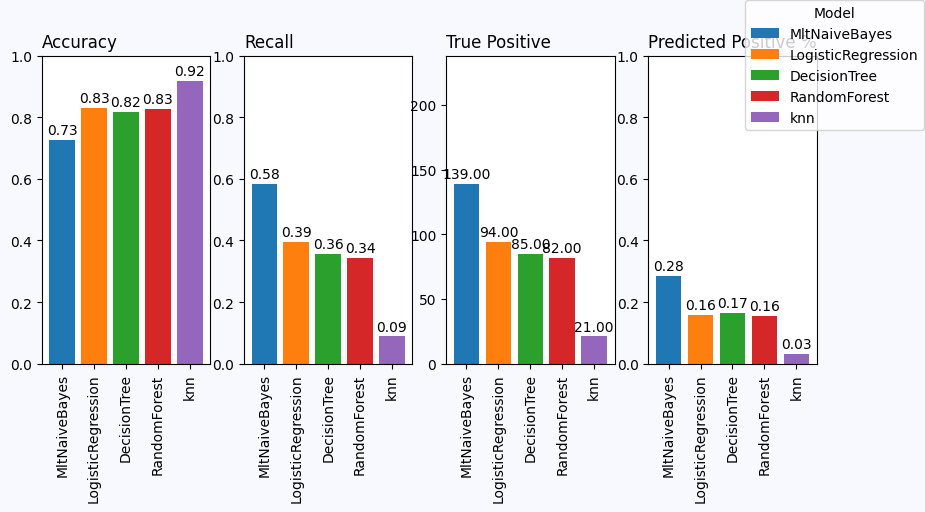

In [ ]:
accuray_a=[]
recall_a=[]
tp_a=[]
pred_p=[]

for name,model in models:
#     model = m['model'] # select the model
    model.fit(X_train2, y_train_balanced) # train the model
    y_pred=model.predict(X_benchmark) # predict the test data
# Compute False postive rate, and True positive rate
    #fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])

# classification report
    clf =classification_report(y_benchmark,y_pred)
# confusion matrix
    cm=confusion_matrix(y_benchmark,y_pred)
    tn, fp, fn, tp=cm.ravel()
    rec = tp/(tp+fn)
    pt=tp+fn # positive target
    prp = (tp+fp)/(tn + fp + fn + tp)
# accuracy score
    acc=accuracy_score(y_benchmark,y_pred)

    accuray_a.append(acc)
    recall_a.append(rec)
    tp_a.append(tp)
    pred_p.append(prp)
    print(name,' -   classification report          ', clf, '\n','  confusion matrix \n', cm )
    print ("TP: ", tp,", FP: ", fp,", TN: ", tn,", FN:", fn)
    print('accuracy ' , acc,'\n', 'recall  ', rec )

df_mod_acc2 = pd.DataFrame({'Model':names, 'accuracy':accuray_a})
df_mod_rec2 = pd.DataFrame({'Model':names, 'recall':recall_a})
df_mod_pt2 = pd.DataFrame({'Model':names, 'True Positive':tp_a})
df_mod_prp = pd.DataFrame({'Model':names, 'Predicted Positive':pred_p})
X_a = df_mod_acc2['Model']
Y_a  = df_mod_acc2['accuracy']
X_b = df_mod_rec2['Model']
Y_b  = df_mod_rec2['recall']
X_c = df_mod_pt2['Model']
Y_c  = df_mod_pt2['True Positive']
X_d = df_mod_prp['Model']
Y_d  = df_mod_prp['Predicted Positive']


#Now, plot the computed values
colors = dict(mcolors.TABLEAU_COLORS)
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(10, 4), facecolor="ghostwhite")

ax1.bar(X_a, Y_a, label=X_a, color=colors)
ax1.bar_label(ax1.containers[0], label_type='edge', padding=2, fmt='%0.2f')
ax1.set_title('Accuracy', loc="left")
ax1.set_ylim([0,1])
#ax1.legend(loc="lower right")
ax1.set_xticklabels(X_a, rotation=90)

ax2.bar(X_b, Y_b, label=X_b, color=colors)
ax2.bar_label(ax2.containers[0], label_type='edge', padding=2, fmt='%0.2f')
ax2.set_title('Recall', loc="left")
ax2.set_ylim([0,1])
#ax2.legend(loc="upper right")
ax2.set_xticklabels(X_b, rotation=90)

ax3.bar(X_c, Y_c, label=X_c, color=colors)
ax3.bar_label(ax3.containers[0], label_type='edge', padding=2, fmt='%0.2f')
ax3.set_title('True Positive', loc="left")
ax3.set_ylim([0,pt])
#ax3.legend(loc="upper right")
ax3.set_xticklabels(X_c, rotation=90)

ax4.bar(X_d, Y_d, label=X_d, color=colors)
ax4.bar_label(ax4.containers[0], label_type='edge', padding=2, fmt='%0.2f')
ax4.set_title('Predicted Positive %', loc="left")
ax4.set_ylim([0,1])
#ax3.legend(loc="upper right")
ax4.set_xticklabels(X_c, rotation=90)



# Create the legend
fig.legend(     # The line objects
           labels=X_a,   # The labels for each line
           loc="upper right",   # Position of legend
           borderaxespad=0.1,    # Small spacing around legend box
           title="Model"  # Title for the legend
           )

# Adjust the scaling factor to fit your legend text completely outside the plot
# (smaller value results in more space being made for the legend)
#plt.subplots_adjust(right=0.9)

plt.show()   # Display

fig.savefig("Accuracy_Recall_b_1.png")

# Saving figure by changing parameter values
fig.savefig("Accuracy_Recall_b_2.png", facecolor='w', bbox_inches="tight",
            pad_inches=0.1, transparent=True)

⚡**Precision** – What percent of your predictions were correct?
Precision – Accuracy of positive predictions.

Precision = TP/(TP + FP)

**Recall** – What percent of the positive cases did you catch?

Recall: Fraction of positives that were correctly identified.

Recall = TP/(TP+FN)


 ♈In this reaserch there is no harm in having false predictions. But I am interested in having more positive cases.  I will choose the model with higher recall on target = 1. ♈

1) with 59 variables (428 encoded columns) in the training set, NB give 87% accuracy and identify 64 true positive targets

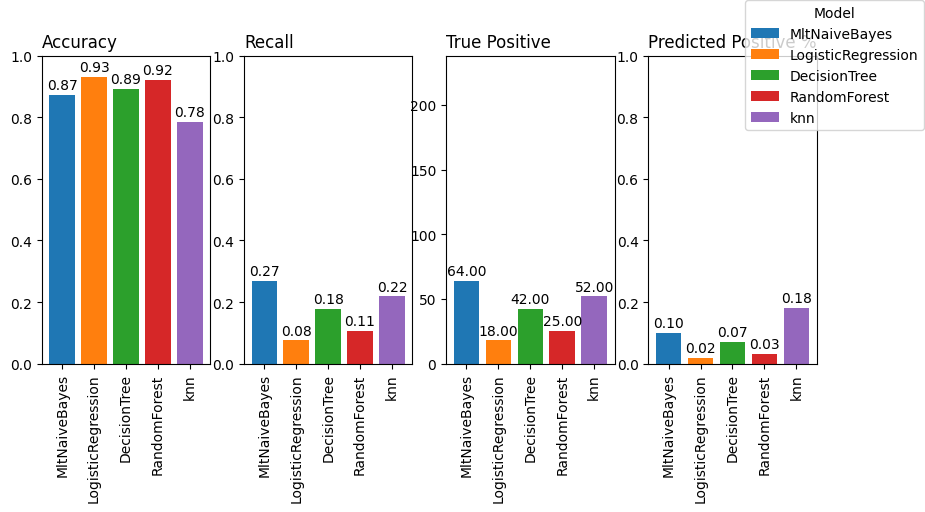

2) with 300 encoded columns) in the training set, NB give 83% accuracy and identify 78 true positive targets from the validation set
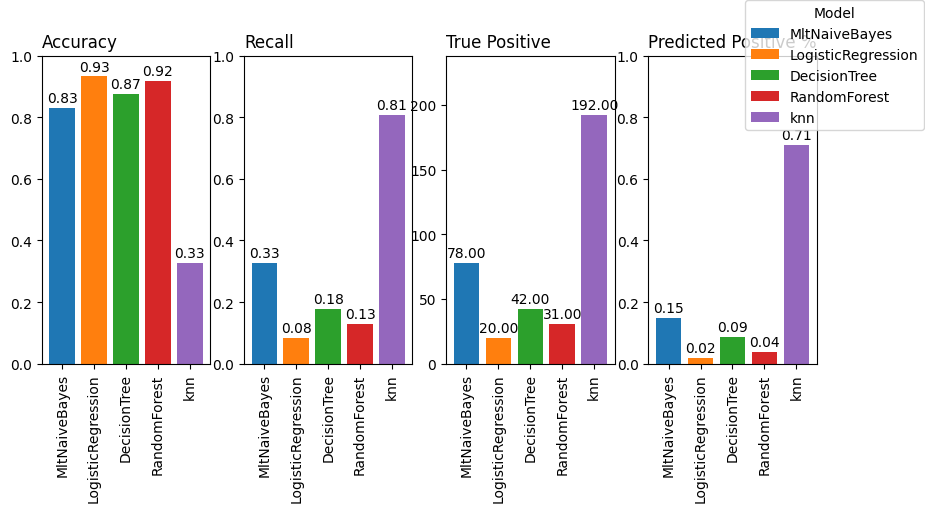


3) with 100 encoded columns) in the training set, NB give 77% accuracy and identify 102 true positive targets from the validation set
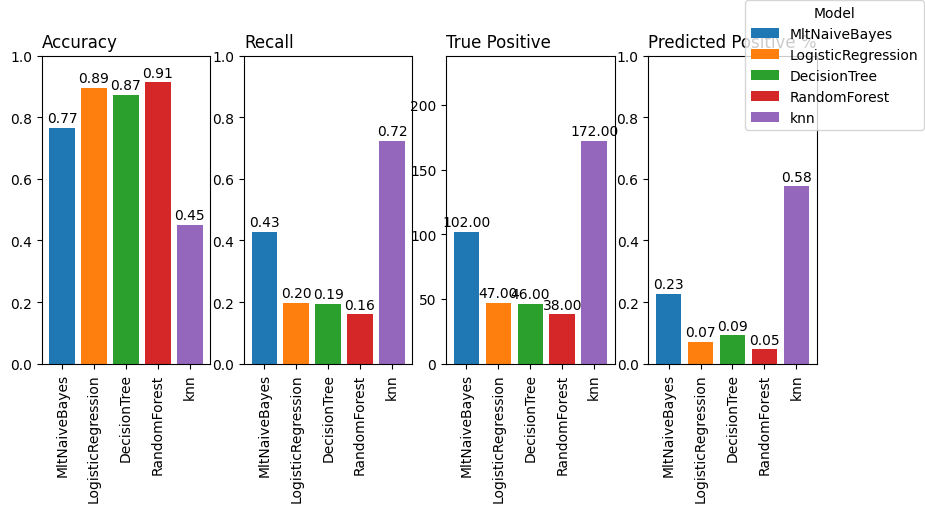

4)	with 28 encoded columns in the training set, NB correctly predict 139 positive targets with 73% accuracy.

By selecting this model, I am recomending marketting department to reach out to 28% of their customer base.  139 customers will buy caravan insurance policy.
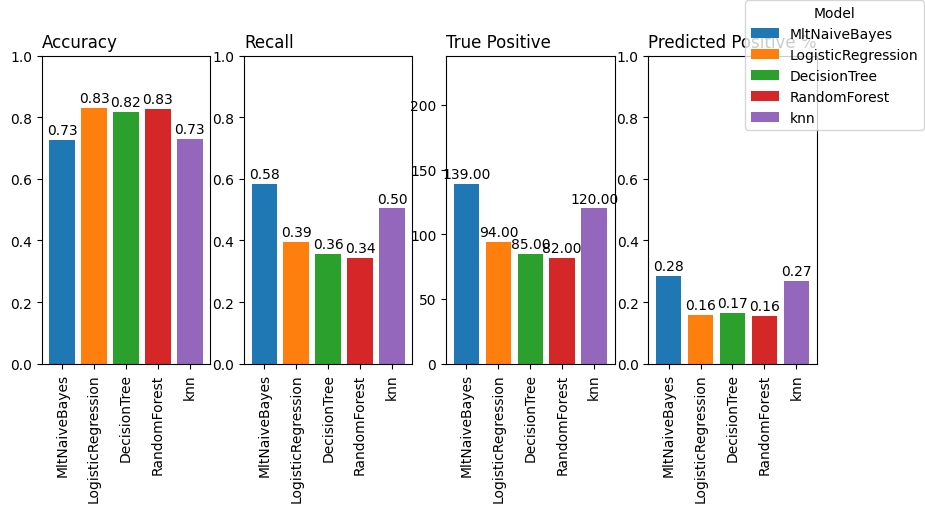

# Feature Selection

**Correlation matrix**

This step is already completed at the initial stage. Refer to Note2 in this notebook.

**Removing features with low variance**

This step is already completed at the initial stage. Refer to Note1 in this notebook.

**Select features based on best Chi square value**

In [ ]:
# identifying features with best chi squre value
from sklearn.feature_selection import SelectKBest

# for classification, we use these three
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif

# this function will take in X, y variables
# with criteria, and return a dataframe
# with most important columns
# based on that criteria
def featureSelect_dataframe(X, y, criteria, k):

    # initialize our function/method
    reg = SelectKBest(criteria, k=k).fit(X,y)

    # transform after creating the reg (so we can use getsupport)
    X_transformed = reg.transform(X)

    # filter down X based on kept columns
    X = X[[val for i,val in enumerate(X.columns) if reg.get_support()[i]]]

    # return that dataframe
    return X

New_X = featureSelect_dataframe(X_train_balanced, y_train_balanced, chi2, 28)

sel_cols=New_X.columns

#datasets with selected columns
X_train_balanced_sel2 = X_train_balanced[sel_cols]

X_train_balanced_sel2.shape

(7666, 28)

In [ ]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=28)
fit = bestfeatures.fit(X_train_balanced, y_train_balanced)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_train_balanced.columns)

 #concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] #naming the dataframe columns
featureScores
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                           Specs       Score
364             po_ins_pol_car_0  723.214286
424             dr_car_tptypvt_1  584.956522
423             dr_car_tptypvt_0  444.712103
348  po_ins_pol_thirdparty_pvt_0  414.559214
165      sd_empst_skill_labour_3  404.464789
366             po_ins_pol_car_5  363.691796
175    sd_empst_unskill_labour_3  340.165740
333              sd_income_avg_3  310.595664
217            sd_socialclassC_5  301.896208
286            sd_income_l_30k_5  289.169082


In [ ]:
# Reducing features by dropping low variance columns
New_X.columns

Index(['sd_religion_other_1', 'sd_hshold_wo_children_3',
       'sd_hshold_wo_children_4', 'sd_empst_farmer_1',
       'sd_empst_skill_labour_3', 'sd_empst_unskill_labour_3',
       'sd_socialclassC_5', 'sd_homeowners_1', 'sd_car_1_4', 'sd_car_1_5',
       'sd_car_0_4', 'sd_health_ins_private_1', 'sd_health_ins_private_3',
       'sd_income_l_30k_5', 'sd_income_30k_45k_5', 'sd_income_45k_75k_2',
       'sd_income_avg_3', 'sd_p_power_class_1', 'sd_p_power_class_2',
       'sd_p_power_class_3', 'sd_p_power_class_5',
       'po_ins_pol_thirdparty_pvt_0', 'po_ins_pol_car_0', 'po_ins_pol_car_5',
       'po_ins_pol_car_6', 'dr_car_tptypvt_0', 'dr_car_tptypvt_1',
       'dr_car_tptypvt_2'],
      dtype='object')

Best attributes predicting caravan policy

Index(['sd_religion_other_1', 'sd_hshold_wo_children_3',
       'sd_hshold_wo_children_4', 'sd_empst_farmer_1',
       'sd_empst_skill_labour_3', 'sd_empst_unskill_labour_3',
       'sd_socialclassC_5', 'sd_homeowners_1', 'sd_car_1_4', 'sd_car_1_5',
       'sd_car_0_4', 'sd_health_ins_private_1', 'sd_health_ins_private_3',
       'sd_income_l_30k_5', 'sd_income_30k_45k_5', 'sd_income_45k_75k_2',
       'sd_income_avg_3', 'sd_p_power_class_1', 'sd_p_power_class_2',
       'sd_p_power_class_3', 'sd_p_power_class_5',
       'po_ins_pol_thirdparty_pvt_0', 'po_ins_pol_car_0', 'po_ins_pol_car_5',
       'po_ins_pol_car_6', 'dr_car_tptypvt_0', 'dr_car_tptypvt_1',
       'dr_car_tptypvt_2'],

**k fold cross validation**